## Import Libraries

In [1]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge

# For Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import  RandomForestRegressor, AdaBoostRegressor
from sklearn.naive_bayes import BernoulliNB, GaussianNB,MultinomialNB
from xgboost import XGBRegressor,XGBRFRegressor

#Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# For Warnings
import warnings
warnings.filterwarnings('ignore')

## Problem Statememnt

## Data Gathering

In [2]:
df = pd.read_csv("cycle_sharing.csv")
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0000,16,0,5,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,1,5,1,0
2,1,0,0,1,9.02,13.635,80,0.0000,32,2,5,1,0
3,1,0,0,1,9.84,14.395,75,0.0000,13,3,5,1,0
4,1,0,0,1,9.84,14.395,75,0.0000,1,4,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,19,2,12,1
10882,4,0,1,1,14.76,17.425,57,15.0013,241,20,2,12,1
10883,4,0,1,1,13.94,15.910,61,15.0013,168,21,2,12,1
10884,4,0,1,1,13.94,17.425,61,6.0032,129,22,2,12,1


## EDA (Exploratory Data Analysis)

In [3]:
df.head() # It will print by default first 5 records
#df.head(10) #It will print first 10 records

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,16,0,5,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,1,5,1,0
2,1,0,0,1,9.02,13.635,80,0.0,32,2,5,1,0
3,1,0,0,1,9.84,14.395,75,0.0,13,3,5,1,0
4,1,0,0,1,9.84,14.395,75,0.0,1,4,5,1,0


In [4]:
df.tail() # It will print bydefault last 5 records
#df.tail(10) # It will print last 10 records

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
10881,4,0,1,1,15.58,19.695,50,26.0027,336,19,2,12,1
10882,4,0,1,1,14.76,17.425,57,15.0013,241,20,2,12,1
10883,4,0,1,1,13.94,15.910,61,15.0013,168,21,2,12,1
10884,4,0,1,1,13.94,17.425,61,6.0032,129,22,2,12,1
10885,4,0,1,1,13.12,16.665,66,8.9981,88,23,2,12,1


In [5]:
df.shape # Display shape of dataset with rows and columns

(10886, 13)

In [6]:
df.info() #prints information about the Dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   hour        10886 non-null  int64  
 10  day         10886 non-null  int64  
 11  month       10886 non-null  int64  
 12  year        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


In [7]:
df.isna().sum() #print missing values, There is no Missing values in our dataset

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
hour          0
day           0
month         0
year          0
dtype: int64

In [8]:
df.describe() #print statistical information for only numeric columns

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132,11.541613,3.013963,6.521495,0.501929
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454,6.915838,2.004585,3.444373,0.500019
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000,6.000000,1.000000,4.000000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000,12.000000,3.000000,7.000000,1.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000,18.000000,5.000000,10.000000,1.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000,23.000000,6.000000,12.000000,1.000000


In [9]:
df.nunique() #returns the number of unique values for each column

season          4
holiday         2
workingday      2
weather         4
temp           49
atemp          60
humidity       89
windspeed      28
count         822
hour           24
day             7
month          12
year            2
dtype: int64

In [10]:
df.columns # display column names of dataset

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'hour', 'day', 'month', 'year'],
      dtype='object')

In [11]:
df.dtypes #print the data type of every column

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
hour            int64
day             int64
month           int64
year            int64
dtype: object

In [12]:
df['season'].value_counts() # 1 = spring, 2 = summer, 3 = fall, 4 = winter

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

<AxesSubplot:xlabel='season', ylabel='count'>

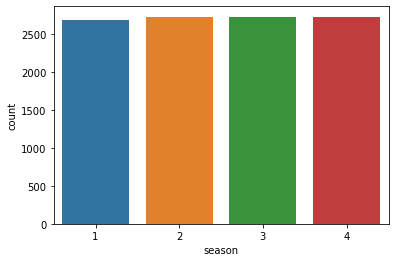

In [13]:
sns.countplot(x=df['season'])

In [14]:
df['holiday'].value_counts() #whether the day is considered a holiday

0    10575
1      311
Name: holiday, dtype: int64

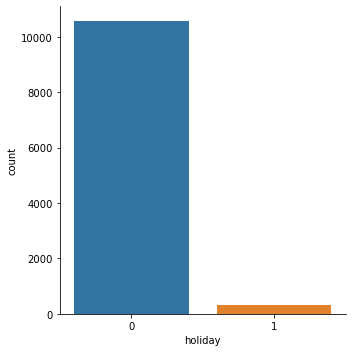

In [15]:
sns.factorplot(x='holiday', data=df, kind='count', size=5, aspect=1) ## majority of data is for non holiday days.

In [16]:
df['workingday'].value_counts() #whether the day is neither a weekend nor holiday

1    7412
0    3474
Name: workingday, dtype: int64

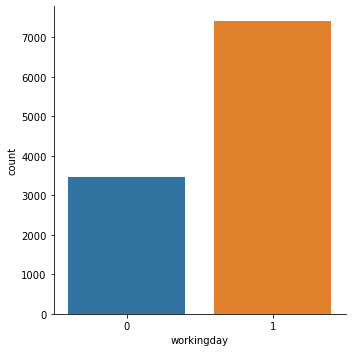

In [17]:
sns.factorplot(x='workingday', data=df, kind='count', size=5, aspect=1) ## majority of data is for non holiday days.

In [18]:
df['weather'].value_counts() #1: Clear, Few clouds, Partly cloudy, Partly cloudy

#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<AxesSubplot:xlabel='weather', ylabel='count'>

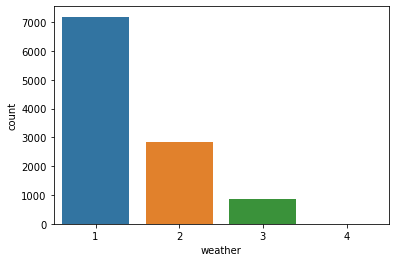

In [19]:
sns.countplot(x=df['weather'])

In [20]:
df['temp'].value_counts()

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

In [21]:
df['atemp'].value_counts()

31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.335    364
21.210    356
30.305    350
15.150    338
21.970    328
24.240    327
17.425    314
31.820    299
34.850    283
27.275    282
32.575    272
11.365    271
14.395    269
29.545    257
19.695    255
15.910    254
12.880    247
13.635    237
34.090    224
12.120    195
28.790    175
23.485    170
10.605    166
35.605    159
9.850     127
18.180    123
36.365    123
37.120    118
9.090     107
37.880     97
28.030     80
7.575      75
38.635     74
6.060      73
39.395     67
6.820      63
8.335      63
18.940     45
40.150     45
40.910     39
5.305      25
42.425     24
41.665     23
3.790      16
4.545      11
3.030       7
43.940      7
2.275       7
43.180      7
44.695      3
0.760       2
1.515       1
45.455      1
Name: atemp, dtype: int64

In [22]:
df['humidity'].value_counts()

88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

In [23]:
df['windspeed'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

In [24]:
df['day'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: day, dtype: int64

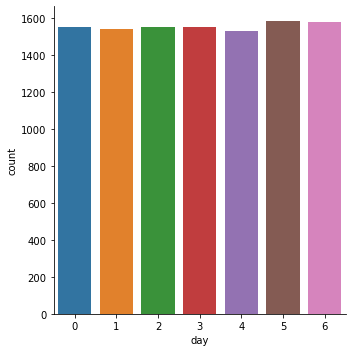

In [25]:
sns.factorplot(x='day', data=df, kind='count', size=5, aspect=1) ## majority of data is for non holiday days.

In [26]:
df['month'].value_counts()

5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: month, dtype: int64

In [27]:
df['year'].value_counts()

1    5464
0    5422
Name: year, dtype: int64

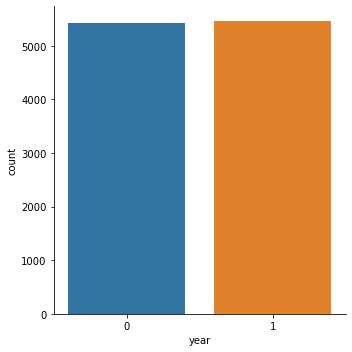

In [28]:
sns.factorplot(x='year', data=df, kind='count', size=5, aspect=1) ## majority of data is for non year.

In [29]:
df['count'].value_counts()

5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

### 1. Checking Outliers

<AxesSubplot:xlabel='season'>

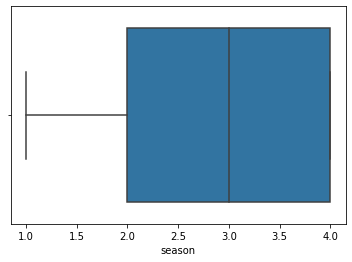

In [30]:
sns.boxplot(df["season"])

<AxesSubplot:xlabel='weather'>

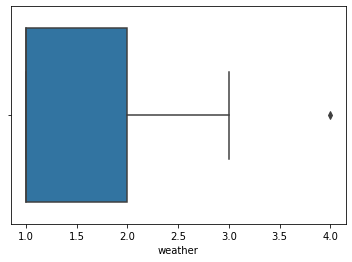

In [31]:
sns.boxplot(df['weather'])

<AxesSubplot:xlabel='weather'>

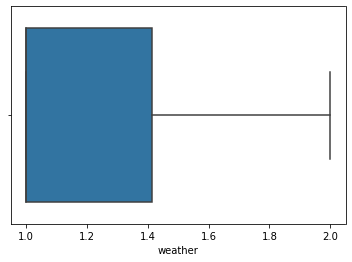

In [32]:
sns.boxplot(np.sqrt(df['weather']))

In [33]:
df['weather'] = np.sqrt(df['weather'])

<AxesSubplot:xlabel='weather'>

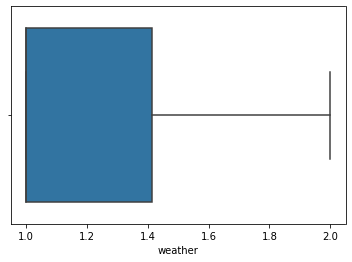

In [34]:
sns.boxplot(df['weather'])

<AxesSubplot:xlabel='temp'>

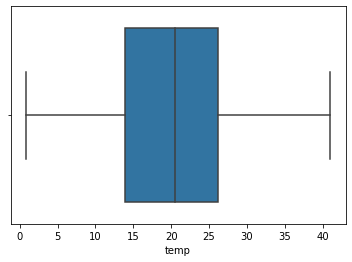

In [35]:
sns.boxplot(df['temp'])

<AxesSubplot:xlabel='atemp'>

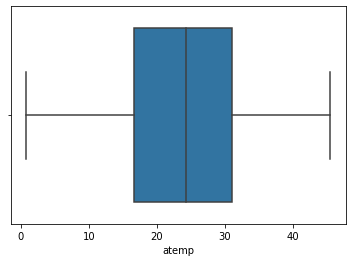

In [36]:
sns.boxplot(df['atemp'])

<AxesSubplot:xlabel='humidity'>

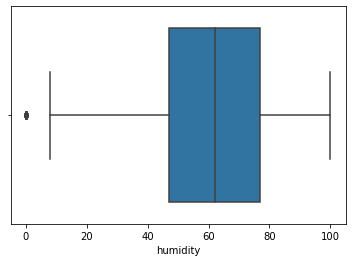

In [37]:
sns.boxplot(df['humidity'])

In [38]:
df['humidity'].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

In [39]:
df['humidity'] = df['humidity'].replace(df['humidity'].min(),11)

<AxesSubplot:xlabel='humidity'>

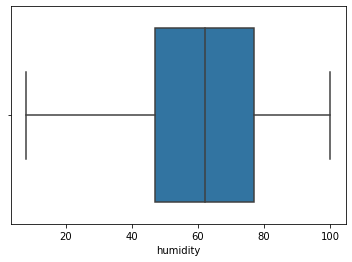

In [40]:
sns.boxplot(df['humidity'])

<AxesSubplot:xlabel='windspeed'>

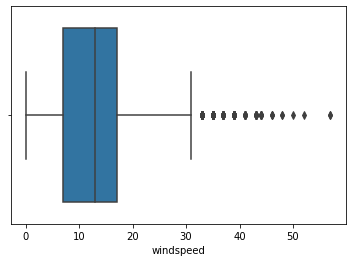

In [41]:
sns.boxplot(df['windspeed'])

<AxesSubplot:xlabel='windspeed'>

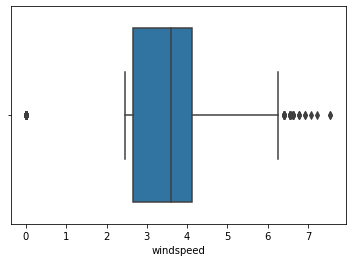

In [42]:
sns.boxplot(np.sqrt(df["windspeed"]))

<AxesSubplot:xlabel='windspeed'>

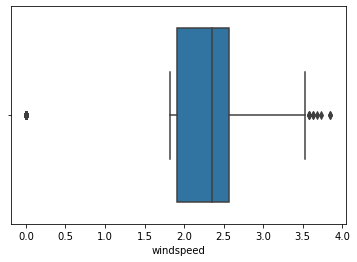

In [43]:
sns.boxplot(np.cbrt(df["windspeed"]))

In [44]:
np.cbrt(df['windspeed']).describe()

count    10886.000000
mean         2.093992
std          0.853695
min          0.000000
25%          1.913068
50%          2.351214
75%          2.571176
max          3.848431
Name: windspeed, dtype: float64

In [45]:
df['windspeed'] = df['windspeed'].replace(df['windspeed'].max(),3.8)
df['windspeed'] = df['windspeed'].replace(df['windspeed'].max(),3.8)
df['windspeed'] = df['windspeed'].replace(df['windspeed'].max(),3.8)
df['windspeed'] = df['windspeed'].replace(df['windspeed'].max(),3.8)
df['windspeed'] = df['windspeed'].replace(df['windspeed'].max(),3.8)

<AxesSubplot:xlabel='windspeed'>

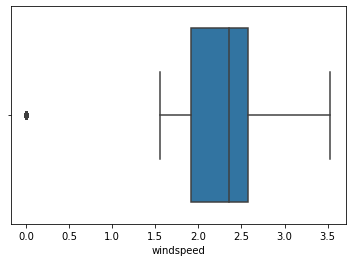

In [46]:
sns.boxplot(np.cbrt(df['windspeed']))

In [47]:
df['windspeed'] = df['windspeed'].replace(df['windspeed'].min(),1.6)

<AxesSubplot:xlabel='windspeed'>

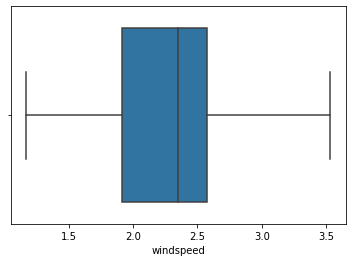

In [48]:
sns.boxplot(np.cbrt(df['windspeed']))

In [49]:
df['windspeed'] = np.cbrt(df['windspeed'])

<AxesSubplot:xlabel='windspeed'>

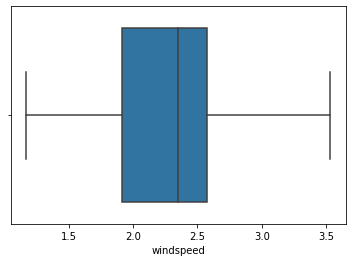

In [50]:
sns.boxplot(df['windspeed'])

<AxesSubplot:xlabel='temp'>

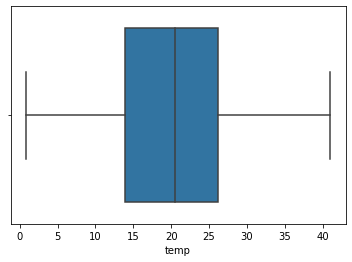

In [51]:
sns.boxplot(df['temp'])

<AxesSubplot:xlabel='atemp'>

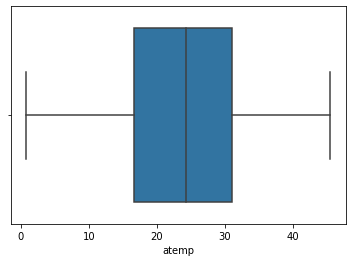

In [52]:
sns.boxplot(df['atemp'])

In [53]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
season,1.000000,0.029368,-0.008126,0.009580,0.258689,0.264744,0.189694,-0.131993,0.163439,-0.006546,-0.010553,0.971524,-0.004797
holiday,0.029368,1.000000,-0.250491,-0.005515,0.000295,-0.005215,0.001736,0.006225,-0.005393,-0.000354,-0.191832,0.001731,0.012021
workingday,-0.008126,-0.250491,1.000000,0.032357,0.029966,0.024660,-0.010123,0.013244,0.011594,0.002780,-0.704267,-0.003394,-0.002482
weather,0.009580,-0.005515,0.032357,1.000000,-0.056310,-0.056106,0.409217,0.008255,-0.125840,-0.026035,-0.048367,0.013248,-0.010310
temp,0.258689,0.000295,0.029966,-0.056310,1.000000,0.984948,-0.065806,-0.000284,0.394454,0.145430,-0.038466,0.257589,0.061226
atemp,0.264744,-0.005215,0.024660,-0.056106,0.984948,1.000000,-0.044282,-0.039986,0.389784,0.140343,-0.040235,0.264173,0.058540
humidity,0.189694,0.001736,-0.010123,0.409217,-0.065806,-0.044282,1.000000,-0.294523,-0.319496,-0.278842,-0.026605,0.204048,-0.080037
windspeed,-0.131993,0.006225,0.013244,0.008255,-0.000284,-0.039986,-0.294523,1.000000,0.110031,0.149187,-0.021506,-0.134328,-0.005801
count,0.163439,-0.005393,0.011594,-0.125840,0.394454,0.389784,-0.319496,0.110031,1.000000,0.400601,-0.002283,0.166862,0.260403
hour,-0.006546,-0.000354,0.002780,-0.026035,0.145430,0.140343,-0.278842,0.149187,0.400601,1.000000,-0.002925,-0.006818,-0.004234


<AxesSubplot:>

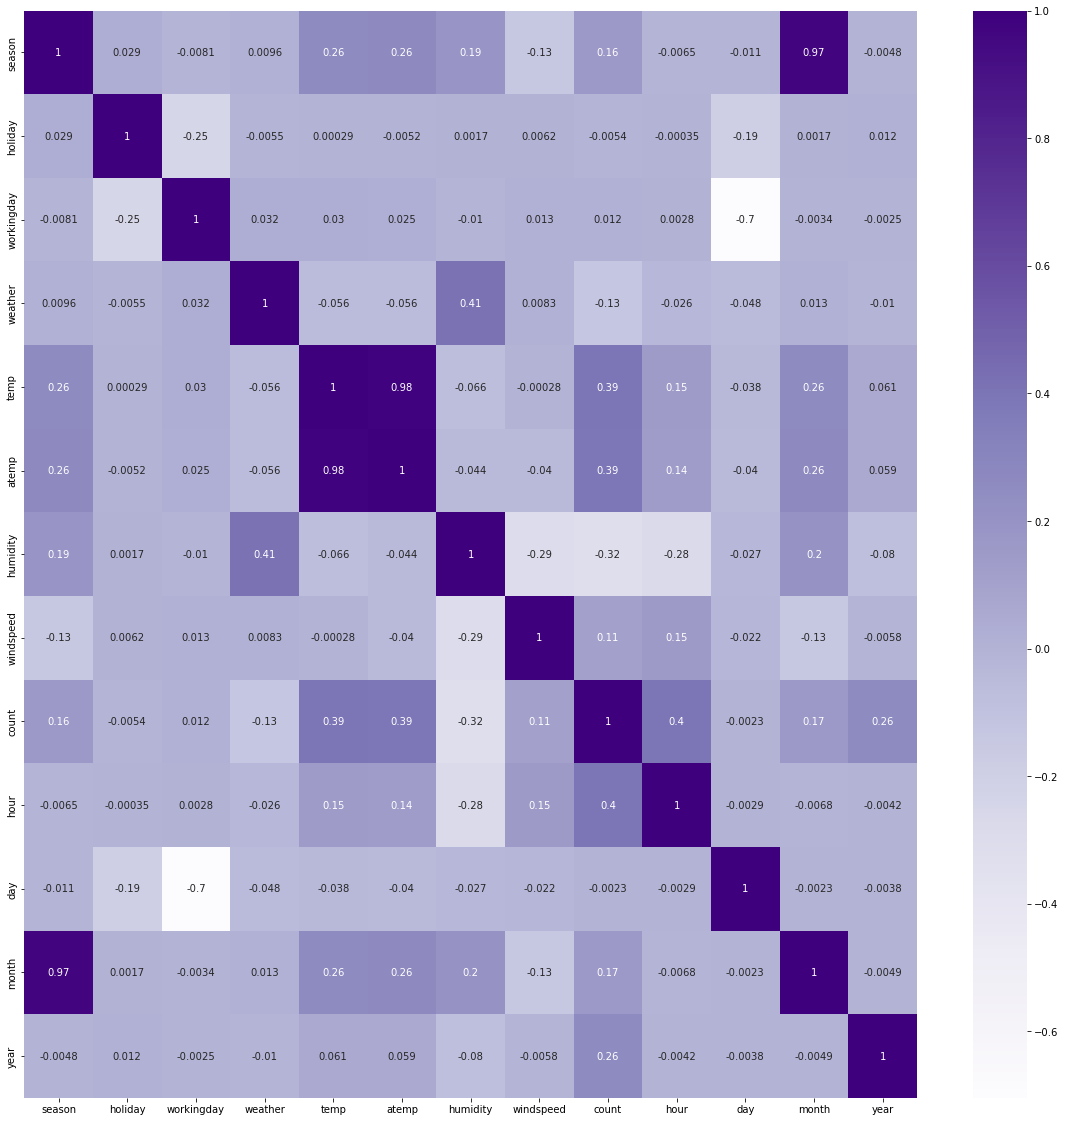

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="Purples")

## Feature Selection

In [55]:
x = df.drop('count', axis=1)
x.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,1,0,0,1.0,9.84,14.395,81,1.169607,0,5,1,0
1,1,0,0,1.0,9.02,13.635,80,1.169607,1,5,1,0
2,1,0,0,1.0,9.02,13.635,80,1.169607,2,5,1,0


In [56]:
y = df["count"]
y.head(3)

0    16
1    40
2    32
Name: count, dtype: int64

## Train Test Split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Model Training / Evaluation

## 1. Linear Regression

In [58]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [59]:
y_pred = lr_model.predict(x_test)
y_pred[5:10]

array([317.63286933, 184.64281541, 301.80508861, 175.26172675,
        16.24879431])

In [60]:
y_test[5:10]

10044    166
5337     144
2753     376
10127    601
33        53
Name: count, dtype: int64

In [61]:
# Training Data Evaluation

y_pred_train = lr_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print('R-Squared :',r2)

MSE : 20043.11470649726
RMSE : 141.57370768083055
MAE : 106.21590139512729
R-Squared : 0.3882041624432593


In [62]:
# Testing Data Evaluation
y_pred = lr_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print('R-Squared :',r2)

MSE : 19929.697379155852
RMSE : 141.17258012502234
MAE : 105.20875291542745
R-Squared : 0.3961966823988985


### Regularization

In [63]:
ridge_model = Ridge(alpha=0.08) #Alpha = Lambda >> Hyperparameter 
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.08)

In [64]:
# Training Data Accuracy
y_pred_train = ridge_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("Testing MSE is:",mse)
r2 = r2_score(y_train,y_pred_train)
print("Testing R2 score is:",r2)

Testing MSE is: 20043.1147093192
Testing R2 score is: 0.3882041623571225


In [65]:
# Testing data

y_pred = ridge_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("Testing MSE is:",mse)
r2 = r2_score(y_test,y_pred)
print("Testing R2 score is:",r2)


Testing MSE is: 19929.695379755754
Testing R2 score is: 0.3961967429740486


## 2. KNN Regression

In [66]:
normal_scalar = MinMaxScaler()
normal_scalar.fit(x_train) # we are storing minimum and maximum values
array = normal_scalar.transform(x_train)

normal_train_xdf = pd.DataFrame(array,columns =x_train.columns )
normal_train_xdf.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,0.666667,0.0,1.0,0.0,0.673469,0.694932,0.811111,0.274424,0.217391,0.333333,0.545455,0.0
1,0.666667,0.0,0.0,0.0,0.897959,0.898311,0.322222,0.654374,0.695652,0.833333,0.636364,1.0
2,0.666667,0.0,1.0,0.0,0.795918,0.779617,0.344444,0.593706,0.652174,0.333333,0.545455,1.0


In [67]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(normal_train_xdf,y_train)

KNeighborsRegressor()

In [68]:
#Training data accuracy
y_pred_train = knn_reg.predict(normal_train_xdf)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared :",r2_value)

MSE : 7393.8795590261825
RMSE: 85.98767097105365
MAE : 55.53964170877355
R-Squared : 0.7743092925501386


In [69]:
array = normal_scalar.transform(x_test)

normal_test_df = pd.DataFrame(array,columns = x_test.columns)
normal_test_df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,0.666667,0.0,1.0,0.0,0.816327,0.881307,0.544444,0.000000,0.478261,0.166667,0.545455,0.0
1,0.000000,1.0,0.0,0.0,0.081633,0.135586,0.488889,0.274424,0.260870,0.000000,0.000000,1.0
2,1.000000,0.0,0.0,0.0,0.224490,0.237275,0.422222,0.500530,0.782609,1.000000,1.000000,0.0


In [70]:
#Testing Data Evaluation

y_pred = knn_reg.predict(normal_test_df)


mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test,y_pred)
print("R-Squared :",r2_value)

MSE : 11181.618089990818
RMSE: 105.74317041771926
MAE : 69.03774104683195
R-Squared : 0.6612342891896477


r2_train_list:
 [0.8844731703433212, 0.833021675136991, 0.7973051359210235, 0.770369137552456, 0.7515767895915737, 0.7360604485454971, 0.7272445577028825, 0.7185381139055518, 0.7120308080826657, 0.7070547939046079, 0.7016555644779614, 0.6955770630971709, 0.6905901991971823, 0.6856947244439398, 0.6826668727473304, 0.6782105939191518, 0.674148816455609, 0.6704965030797558, 0.6671334751205835]

r2_test_list:
 [0.654258979219742, 0.6650454999193571, 0.6518297794570254, 0.6509384416273398, 0.6478843655783395, 0.6506986926972136, 0.653396026845164, 0.6553408401070637, 0.6572196809298203, 0.6563396728641744, 0.6537394058298115, 0.6503608996637504, 0.6496845690334825, 0.6472719639374798, 0.6450401510231953, 0.6445576991209925, 0.6410472498581677, 0.6383301865406721, 0.6362208408426264]


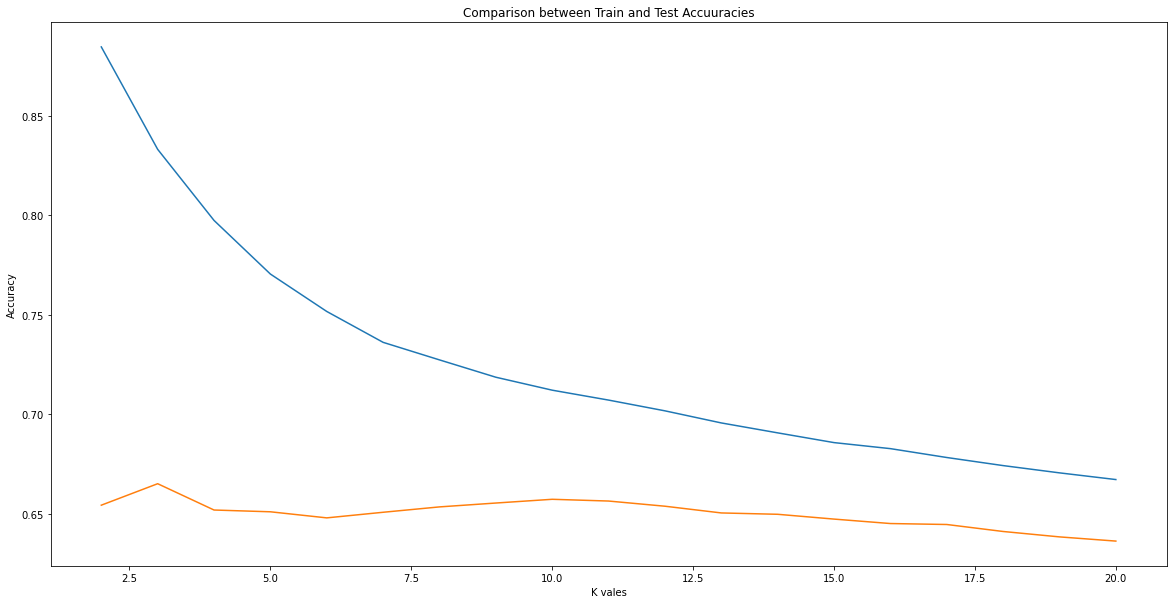

In [71]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(normal_train_xdf,y_train)
    r2_train = knn_reg.score(normal_train_xdf,y_train)
    r2_train_list.append(r2_train)
    
    r2_test = knn_reg.score(normal_test_df,y_test)
    r2_test_list.append(r2_test)
    
print("r2_train_list:\n",r2_train_list )
print()
print("r2_test_list:\n",r2_test_list)


plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.xlabel("K vales")
plt.ylabel("Accuracy")
plt.title("Comparison between Train and Test Accuuracies")
plt.savefig("K values comparision.jpeg")

### Hyper-parameter Tunning of KNN Regressor

In [72]:
knn_reg = KNeighborsRegressor() 

hyperparameters = {"n_neighbors" : np.arange(3,20),
                  'p' :[1,2]}

gscv_knn_reg = GridSearchCV(knn_reg,hyperparameters,cv=5)
gscv_knn_reg.fit(normal_train_xdf, y_train)
gscv_knn_reg.best_estimator_

KNeighborsRegressor(n_neighbors=9, p=1)

In [73]:
knn_reg = KNeighborsRegressor(n_neighbors=9,p=1)
knn_reg.fit(normal_train_xdf,y_train)

KNeighborsRegressor(n_neighbors=9, p=1)

In [74]:
#Training data accuracy

y_pred_train = knn_reg.predict(normal_train_xdf)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared :",r2_value)

MSE : 9221.005639769306
RMSE: 96.02606750132647
MAE : 65.23546674832849
R-Squared : 0.7185381139055518


In [75]:
#Testing Data Evaluation

y_pred = knn_reg.predict(normal_test_df)


mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test,y_pred)
print("R-Squared :",r2_value)

MSE : 11376.142785883527
RMSE: 106.65900236681162
MAE : 72.72064075094379
R-Squared : 0.6553408401070637


<h5> As we can say that even doing hyperparameter tunning we are not getting desired accuracy. So, we will go for another algorithm. </h5>

### 3. Decision Tree

In [76]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [77]:
# Training Data Evaluation

y_pred_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print('R-Squared :',r2)

MSE : 0.0993913642627469
RMSE : 0.3152639596635602
MAE : 0.005627009646302251
R-Squared : 0.9999969661789679


In [78]:
# Testing Data Evaluation
y_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print('R-Squared :',r2)

MSE : 3334.568870523416
RMSE : 57.74572599356091
MAE : 33.39531680440771
R-Squared : 0.8989736919489202


### Hyperparameter Tunning for Decision Tree

In [79]:
dt_reg = DecisionTreeRegressor()

hyperparameters ={ "criterion" :['mse','mae'],
     'max_depth': np.arange(3,14),
     'min_samples_split' : np.arange(2,20),
     'min_samples_leaf':np.arange(2,15)}

gscv_dt_reg = RandomizedSearchCV(dt_reg,hyperparameters, cv = 5,n_jobs=-1)
gscv_dt_reg.fit(x_train, y_train)
gscv_dt_reg.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=13, min_samples_leaf=3,
                      min_samples_split=6)

In [80]:
dt_reg = gscv_dt_reg.best_estimator_
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=13, min_samples_leaf=3,
                      min_samples_split=6)

In [81]:
# Training Data Evaluation
y_pred_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('-'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*80)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('-'*80)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared Value is :",r2_value)

MSE : 1009.7969756049692
--------------------------------------------------------------------------------
RMSE : 31.77730283716617
--------------------------------------------------------------------------------
MAE : 18.948513975021633
--------------------------------------------------------------------------------
R-Squared Value is : 0.9691769669784787


In [82]:
# Testing Data Evaluation
y_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test, y_pred)
print("R-Squared Value is :",r2_value)

MSE : 2710.5960999272465
RMSE : 52.063385405938085
MAE : 31.450665135222867
R-Squared Value is : 0.9178779844633044


### Prunning

In [83]:
decision_tree_model = DecisionTreeRegressor(random_state=10)
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=10)

In [84]:
result = decision_tree_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']
# ccp_alpha_list

##### Pruning is taking longer time to load so here avoiding it.

# 4) Random Forest

In [85]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [86]:
#Training Data Evaluation

y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)
print("-"*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print("-"*80)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)
print("-"*80)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2_value)

MSE : 235.1290234732715
--------------------------------------------------------------------------------
RMSE : 15.333917420974704
--------------------------------------------------------------------------------
MAE: 9.241847879344663
--------------------------------------------------------------------------------
R-Squared value: 0.9928229239838109


In [87]:
#Testing Data Evaluation

y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)
print("-"*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print("-"*80)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)
print("-"*80)

r2_value = r2_score(y_test,y_pred)
print("R-Squared value:",r2_value)

MSE : 1522.7577559397894
--------------------------------------------------------------------------------
RMSE : 39.022528825536014
--------------------------------------------------------------------------------
MAE: 24.401518288950108
--------------------------------------------------------------------------------
R-Squared value: 0.9538655220173645


## Hyper parameter tuning

In [88]:
rf_reg = RandomForestRegressor()

hyperparameters = {'n_estimators':np.arange(10,100),
                
                    'max_depth':np.arange(3,8),  
                    'min_samples_split':np.arange(4,20),
                    'min_samples_leaf':np.arange(3,10),
                    'random_state':[11]}
           
rscv_rf_reg = RandomizedSearchCV(rf_reg,hyperparameters,cv = 6,n_jobs=-1) 
rscv_rf_reg.fit(x_train,y_train)

RandomizedSearchCV(cv=6, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99]),
                                        'random_state': [11]})

In [89]:
rscv_rf_reg.best_estimator_

RandomForestRegressor(max_depth=7, min_samples_leaf=7, min_samples_split=17,
                      n_estimators=42, random_state=11)

In [90]:
rf_reg = rscv_rf_reg.best_estimator_
rf_reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=7, min_samples_split=17,
                      n_estimators=42, random_state=11)

In [91]:
#Training Data Evaluation

y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2_value)

MSE : 5836.1109395919075
RMSE : 76.39444311984941
MAE: 48.594721197017556
R-Squared value: 0.8218586066763238


In [92]:
#Test Data Evaluation

y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

r2_value = r2_score(y_test,y_pred)
print("R-Squared value:",r2_value)

MSE : 5655.69656655841
RMSE : 75.20436534243481
MAE: 48.917160481411464
R-Squared value: 0.8286512692458268


## 5) Adaboost

In [93]:
adb_reg = AdaBoostRegressor()
adb_reg.fit(x_train,y_train)

AdaBoostRegressor()

In [94]:
#Training Data Evaluation

y_pred_train = adb_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2_value)

MSE : 11906.139999156067
RMSE : 109.1152601571204
MAE: 88.06212489218402
R-Squared value: 0.6365770989430977


In [95]:
#Test Data Evaluation

y_pred = adb_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

r2_value = r2_score(y_test,y_pred)
print("R-Squared value:",r2_value)

MSE : 11919.412120757725
RMSE : 109.17606019983376
MAE: 87.98474901874354
R-Squared value: 0.6388815923569666


### Hyper-parameter Tunning of Adaboost

In [96]:
adb_reg = AdaBoostRegressor(random_state=23)
hyperparameters = {'n_estimators':np.arange(10,100),
                    'learning_rate':np.arange(0,2,0.001)}
                   
rscv_adb_reg = RandomizedSearchCV(adb_reg,hyperparameters,cv = 4)
rscv_adb_reg.fit(x_train,y_train)
                   

RandomizedSearchCV(cv=4, estimator=AdaBoostRegressor(random_state=23),
                   param_distributions={'learning_rate': array([0.000e+00, 1.000e-03, 2.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [97]:
#Training Data Accurcay

y_pred_train = rscv_adb_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2_value)

MSE : 10496.538702601758
RMSE : 102.45261686556258
MAE: 81.82619336647406
R-Squared value: 0.6796037551527214


In [98]:
#Testing Data Accurcay

y_pred_test = rscv_adb_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

r2_value = r2_score(y_test,y_pred)
print("R-Squared value:",r2_value)

MSE : 11919.412120757725
RMSE : 109.17606019983376
MAE: 87.98474901874354
R-Squared value: 0.6388815923569666


## XGBoost  DT 

In [99]:
x_train_xg = np.array(x_train)
y_train_xg = np.array(y_train)

In [100]:
xgb_reg = XGBRegressor()
xgb_reg.fit(x_train_xg,y_train_xg)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [101]:
# Training Data Evaluation
y_pred_train = xgb_reg.predict(x_train_xg)

mse = mean_squared_error(y_train_xg, y_pred_train)
print("MSE :",mse)
print('-'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*80)

mae = mean_absolute_error(y_train_xg, y_pred_train)
print("MAE :",mae)
print('-'*80)

r2_value = r2_score(y_train_xg, y_pred_train)
print("R-Squared Value is :",r2_value)

MSE : 550.1578617118989
--------------------------------------------------------------------------------
RMSE : 23.45544418065663
--------------------------------------------------------------------------------
MAE : 15.397426956447443
--------------------------------------------------------------------------------
R-Squared Value is : 0.9832069868020389


In [102]:
# Testing Data Evaluation
y_pred = xgb_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print('R-Squared :',r2)

MSE : 1471.260444229001
RMSE : 38.35701297323608
MAE : 24.808693686051207
R-Squared : 0.9554257186960674


# Hyper parameter tuning XGBoost DT

In [103]:
xgb_reghp = XGBRegressor()

hyperparameter = {
    "max_depth": [3, 4, 5,6],
    'objective':['reg:squarederror'],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.7],
}
rscv_xgb_reg = RandomizedSearchCV(xgb_reghp,hyperparameter,n_jobs=-1,cv = 6,scoring='neg_mean_squared_error')
rscv_xgb_reg.fit(x_train_xg,y_train_xg)

RandomizedSearchCV(cv=6,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7],
                                        'gamma': [0, 0.25, 1],
                                        'learning_rate': [0.1, 0.01, 0.05],
                                        'max_depth': [3, 4, 5, 6],
                                        'objective': ['reg:squarederror'],
                                        'reg_lambda': [0, 1, 10],
                                        'scale_pos_weight': [1, 3, 5],
                                        'subsample': [0.8]},
                   scoring='neg_mean_squared_error')

In [104]:
rscv_xgb_reg.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.25, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [105]:
rscv_xgb_reg.best_params_

{'subsample': 0.8,
 'scale_pos_weight': 3,
 'reg_lambda': 0,
 'objective': 'reg:squarederror',
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.25,
 'colsample_bytree': 0.7}

In [106]:
xgb_reghp = rscv_xgb_reg.best_estimator_
xgb_reghp.fit(x_train_xg,y_train_xg)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.25, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [107]:
# Training Data Evaluation
y_pred_train = xgb_reghp.predict(x_train_xg)

mse = mean_squared_error(y_train_xg, y_pred_train)
print("MSE :",mse)
print('-'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*80)

mae = mean_absolute_error(y_train_xg, y_pred_train)
print("MAE :",mae)
print('-'*80)

r2_value = r2_score(y_train_xg, y_pred_train)
print("R-Squared Value is :",r2_value)

MSE : 1766.9195128018328
--------------------------------------------------------------------------------
RMSE : 42.03474173587644
--------------------------------------------------------------------------------
MAE : 28.290682685612385
--------------------------------------------------------------------------------
R-Squared Value is : 0.9460665660472658


In [108]:
# Testing Data Evaluation
y_pred = xgb_reghp.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print('R-Squared :',r2)

MSE : 2329.561240098054
RMSE : 48.26552848667519
MAE : 31.671068309355594
R-Squared : 0.929422069057743


In [119]:
#Creating DataFrame for each algorithm accuracies.

d1={'Algorithm':["Linear Regression","KNN","Decision Tree","Random Forest","AdaBoost","XGBoost"],
     "Training Accuracy %":[38.82,77.43,96.91,99.28,63.65,94.60],
      "Testing Accuracy %":[39.63,66.12,91.78,95.38,63.88,92.94],
     "Variance":[0.81,11.31,5.12,3.90,0.23,1.65]}
df2 = pd.DataFrame(d1)
df2

,Algorithm,Training Accuracy %,Testing Accuracy %,Variance
0,Linear Regression,38.82,39.63,0.81
1,KNN,77.43,66.12,11.31
2,Decision Tree,96.91,91.78,5.12
3,Random Forest,99.28,95.38,3.90
4,AdaBoost,63.65,63.88,0.23
5,XGBoost,94.60,92.94,1.65


###### As from above observation we can see that XGBoost is giving excellent accuracy with lowest variance. So we can build our project on XGBoost algorithm.

### Creating Pickle file

In [120]:
import pickle
with open("xgb_reghp.pkl","wb") as f:
    pickle.dump(xgb_reghp,f)

In [121]:
project_data = {'columns' : list(x.columns)}

In [122]:
import json
with open("project_data.json","w") as f:
    json.dump(project_data,f)